# Datasets and Dataloaders
## Loading a Dataset 
Here we are going to load the FashionMNIST Dataset with some parameters. Root is the path where the train/test data is stored. Train which specifies training or test dataset. Download = True, downloads th data from the internet if its not avalable at root. Transform and target_transform specify he feature and label transformations. 

In [1]:
import torch
from torch.utils.data import Dataset 
from torchvision import datasets 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt 

training_data = datasets.FashionMNIST(
root = 'data',
train= True,
download = True,
transform=ToTensor()
)

test_data = datasets.FashionMNIST(
root = 'data',
train = False,
download = True,
transform=ToTensor()
)

## Iterating and Visualizing the Dataset
we can index Datasets manually like a list. We can also use matplotlib to visualize som samples in our training data 


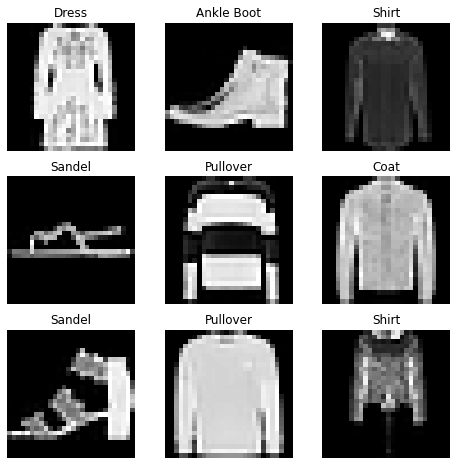

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandel",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols,rows = 3,3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(),cmap='gray')
plt.show()

## Creating a Custom Dataset for your files 
A custom Dataset class must implement three functions init,len,and getitem. 

In [7]:
import os 
import pandas as pd 
from torchvision.io import read_image 

class CustomeImageDataset(Dataset):
    def __init__(self, annotations_file,img_dir,transform=None,target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(Self,idx):
        img_path = img_path = os.path.join(self.img_dir,self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image,label

The init function is run once when  instantiating the dataset object. We initalize the directory containing the images in the annotations file and both transforms 

<p> The len function returns the number of smaples in out dataset </p>
<p>The getitem function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image's location on disk, converts that to a tensor using read image, retrieves the corresponding from the csv data in self.image_labels, calls the transform functions on them, and returns the tensor image and corresponding label in a tuble  </p>

## Preparing your data for training with DataLoaders
The dataset retrieves our dataset features and labels one sample at a time. While trainging a model, we typically want to pass samples in minibatches, reshuffle the data at every epoch to reduce model overfitting, and use pythons multiprocessing to speed up data retrival. Dataloader is an iterable that abstracts this compelxity for us in an easy API


In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=64,shuffle=True)

## Iterate through the DataLoader 
We have loaded that dataset into the Dataloader and can iterate trough the dataset as needed. Each iteration below returns a batch of train features and train labels. Because we specified shuffle = true, after we iterate all batches the data is shuffled 

Feature batch shape:torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


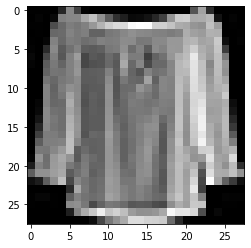

Label:6


In [9]:
# Display image and label 
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape:{train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img,cmap='gray')
plt.show()
print(f"Label:{label}")

# References 
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
